In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
from sklearn.datasets  import make_blobs,make_circles
from sklearn import datasets
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()

# Métodos de proyección

Las estragías de proyección son utilizadas usualmente para reducir la dimensionalidad de los datos. El objetivo de la proyección es representar los elementos de datos de entrada en un espacio de dimensiones más pequeñas de tal manera que ciertas propiedades de la estructura del conjunto de datos se conserven lo más fielmente posible. La proyección se puede utilizar para visualizar el conjunto de datos si se elige una dimensionalidad de salida suficientemente pequeña. En este notebook revisaremos tres de ellos así como algunos conceptos de algebrá lineal necesarios. 

##  Espacios vectoriales
 
Un **espacio vectorial** en su definición abstracta: es un estructura algrebraica creada a partir de un conjunto $V$ (a cuyos elementos  llamanos **vectores**) y un campo $K$ (a sus elementos los llamamos **escalares**) sobre los cuales se definen las operaciones de suma (sobre los elemenos de $V$) y multiplicación entre los elementos de $V$ y $K$ que  cumplen las siguientes propiedades:

**Suma**
Dados $X,Y,Z \in V$ 
1. La suma es cerrada: $ X + Y \in V$
2. Comutatividad: $ X + Y = Y + X$
3. Asociatividad: $ X +(Y + Z) = (X + Y) + Z $
4. Existencia de neutro aditivo: existe $ 0 \in V$ tal que para todo $X \in V$ satisface $ X + 0 = 0 + X = X$
5. Existencia de inverso aditivo: Para todo $X \in V$ existe un elemento $-X \in V$ tal que $X + (-X)=(-X) + X=0$

**Multiplicación por un escalar**
Dados $X,Y \in V$ y $r,s \in K$
1. La multiplicación por un escalar es cerrada: $rX \in V$
2. Asociatividad: $r(sX)=(rs)X$
3. Distributividad en la suma escalar: (r+s)X=rX+sX
4. Distributividad en la suma vectorial: r(X+Y)=rX+rY
5. Existencia de neutro multiplicativo: existe $ 1 \in K$ tal que para todo $X\in V$ satisface $1X=X$  

La intención de esta definición abstracta es presentar las propiedades y operaciones básicas que necesitamos asociar a un conjunto para utilizar las herramientas propias del álgebra lineal y el análisis matemático en su estudio y aplicaciones, sin embargo, es posible que esta definición este muy alejada del concepto más intuitivo que se tiene de **vector** o **espacio** que seguramente nos presentaron en algún curso previo de física o geometría. 
La idea más popular del concepto de **vector** que probablemente manejamos es la proveniente de la fisica donde **se define como el segmento de una recta, el cual se encuentra situado en el espacio de un plano ya sea bidimensional o tridimensional** y se utiliza para representar alguna **propiedad física** que tenga  **magnitud** y **dirección** cómo por ejemplo la velocidad o la fuerza. Recordemos un par de ejemplos:

|Ejemplo|Diagrama de cuerpo libre |
|----------|----------|
|Tensión sobre cuerdas $T_1$ y $T_2$|Representación vectorial|
|<img src="https://cdn.kastatic.org/ka-perseus-images/a3197a5ce184666f657e66dac0559d185a2574f4.svg" alt="drawing" width="80%"/>|<img src="https://cdn.kastatic.org/ka-perseus-images/b2f5a9b54bb74cddd67e57466fedfade53611d3d.svg" alt="drawing" width="80%"/>|
|Ley de Coulomb: Fuerza que ejercen las cargas $B$ y $C$ sobre $A$|Representación vectorial|
|<img src="https://lh3.googleusercontent.com/fg2ZMyX2xwpTQaemxx2f1e6EkoBDTg833wQbxqMYaYDhQnO_u_7eD6C7xSQY7JkcdtCB4aX_4WGzhgb8j9uCgV37A_CaL7sZr_R241eVoqgb7jMBRr-qckowp7UqL6M61JnAbYgz" width="80%" />| <img  src="https://lh5.googleusercontent.com/1-y8K96DvVLyEeEE5ZZSMURVgk04zuFRKgTWOObekQPvZb3rdXaYwTRtzPnpBZip47TjCjTtZI_lufia6tVD2rGZUc-ZvrNo-_YprIZzchnUt9OT-FhNq7Y1ksvAnhkFq7LK-nJ8" width="80%"/> |

En los ejemplos anteriores podemos resaltar varios elementos que nos ayudaran a entender mejor el concepto de espacio vectorial.

1. Pertenecen a disciplinas de la físisca distintas, el primero es un problema de mecánica y el segundo es un problemo de de Electromagnetismo sin embargo la herramienta matemática (un diagrama de cuerpo libre) utilizada para abordar ambos problemas es la misma.
2. Todas la operaciones y medidas que utilizan estos problemas son las correspondientes a los números reales ${\Bbb R}$ y al plano cartesiano ${\Bbb R}^2$
3. En ambos problemas estamos interesados en calcular una fuerza o fuerzas y para ello utilizamos sumas de vectores, es decir se esta dotando de un significado físico a la operación de la suma.
4. Las tensiones, cargas, distancias, longitudes involucrados al final nos hablan de propiedades (**caracteristicas**) físicas del problema que se esta abordando.

Lo anterior da una intuición muy buena pero insuficiente y tal vez incompleta de las bondades que obtenemos al lograr representar un fenómeno utilizando vectores y tiene la desventaja de que estas ideas que involucran flechas y direcciones pueden generalizarse a lo más a ${\Bbb R}^3$ con lo que no podremos abordar problemas que involucren más de 3 dimensiones o caracteristicas.

Para rescatar estos cuatro elementos en un contexto más general por ejemplo en el espacio n-dimensional ${\Bbb R}^n$ necesitamos de esta definición abstracta, note por ejemplo que la suma juega un papel central en la resolución de los dos ejemplos  anteriores. Se puede profundizar bastante en la teoría y consecuencias de esta definición y en muchas ocasiones determinar si un conjunto particular con unas operaciones de suma y multiplicación definidas correctamente cumple las propiedades para ser un espacio vectorial puede ser un problema bastante interesante, sin embargo, en el contexto de este curso de visualización centraremos nuestro interés en ${\Bbb R}^n$ el espacio $n-dimensional$.


## Dos ejemplos importantes

### Ejemplo 1: El espacio vectorial ${\Bbb R}^n$

- **Definimos** ${\Bbb R}^n$ como el conjunto de secuencias ordenadas de números reales de tamaño $n$, es decir 
$$ {\Bbb R}^n = \{(x_1,x_2,\dots,x_n) | x_1,x_2,\dots,x_n \in \Bbb R \} $$
Note que para $n=1$ estamos hablando e los números reales, para $n=2$ estamos hablando del espacio bidimensional o plano cartesiano y para $n=3$ del espacio tridimensional.


- **Suma**: Dados $X,Y \in {\Bbb R}^n$ donde $X=(x_1,x_2,\dots,x_n)$ y $Y=(y_1,y_2,\dots,y_n)$ definimos la suma como sigue
$$X+Y=(x_1 + y_1,x_2 + y_2,\ldots,x_n+y_n )$$


- **Multiplicación por un escalar**: Dados $X \in {\Bbb R}^n$ y $r \in {\Bbb R}$ donde $X=(x_1,x_2,\dots,x_n)$ definimos la multiplicación como:
$$rX=(rx_1,rx_2,\dots,rx_n)$$

**${\Bbb R}^n$ con estas operaciones es un espacio vectorial**. Es decir satisface las 10 propiedades dadas en la definición de espacio vectorial.

### Ejemplo 2: El espacio de funciones continuas $C(\Bbb R)$
- **Definimos** $C(\Bbb R)$ como el conjunto de funciones continuas con valores reales es decir:
$$ C(\Bbb R) = \{f:\Bbb R \to \Bbb R | \text{f es continua} \} $$


- **Suma**: Dados $f,g \in C({\Bbb R})$ donde $f:\Bbb R \to \Bbb R$ y $g:\Bbb R \to \Bbb R$ definimos la suma como sigue
$$f+g=f(x) + g(x) \text{ para todo } x \in \Bbb R $$


- **Multiplicación por un escalar**: Dados $f \in C({\Bbb R})$ y $r \in {\Bbb R}$ donde $f:\Bbb R \to \Bbb R$ definimos la multiplicación como:
$$rf=rf(x) \text{ para todo } x \in \Bbb R$$


**$C(\Bbb R)$ es un espacio vectorial**

La importancia de los dos espacios vectoriales anteriores radica en 

1. Son dos espaciós vectoriales bien conocidos sobre los cuales los conceptos de **magnitud** y **distancia o cercania** estan bien determinados y entendidos, más adelante profundizaremos más en estos conceptos.

2. En la práctica para los estudiantes y entusiastas en las ciencias de datos en la mayoría de los casos lo primero que se hace es intentar representar las caracteristicas o variables de un problema mediante un conjunto de variables reales (vectores en ${\Bbb R}^n$) y en muchos casos incluso esta representación surge naturalmente.

## Espacios Métricos

Un espacio métrico es un conjuto de vectores que podrían haber sido obtenidos ya en forma de vectores de características númericas como  mediciones o estadísticas, pero en muchos casos necesitamos generarlos mediante técnicas de transformación. En la siguiente unidad verememos algunos ejemplos en los que no partimos de datos númericos, pero por ahora consideremos que nuestros datos ya están definidos en un espacio de vectorial.

Los datos que analizaremos estarán dados en forma de una base de datos métrica ${\Bbb B}=\{X_1,...,X_m\}$ de dimensión $n$, donde ${\Bbb B} \subset U$, es decir una muestra del universo de datos $U$. Cada $X_i \in {\Bbb B}$ está definida en $\mathbb{R}^n$  como un vector de $n$ dimensiones $\{x_1,x_2,\dots,x_m\}$.

Para nosotros es común que comparemos dos objetos mediante el uso de un valor númerico u orden de comparación que puede ser cualitativo o cuantitativo.  Por ejemplo tener un ingreso medio, alto o bajo; la distancia entre dos sitios de interés; la cantidad de tiempo que le dedicamos a distintas actividades. También es común que utilicemos más de una valor a la vez.  

Cuando la estrutura de los datos es realivamente simple y los objetos son representados por pocos valores númericos (i.e. dimesión $n \leq 3$) es fácil plasmar la relación entre los objetos de forma visual.

Por ejemplo considere los datos de las siguentes nubes de datos bidimensionales (i.e. para cada $X \in {\Bbb B}$ tenemo que $X_i=\{x_{i,1},x_{i,2} \}$):

In [2]:
def plot_scatters(X,y, clases=[]):
    if clases == []:
        clases=list(set(y))
    for l in set(y):
        idx=np.where(y==l)
        plt.scatter(X[:,0][idx],X[:,1][idx],c=f'C{l}', 
                label=clases[l], alpha=0.7)

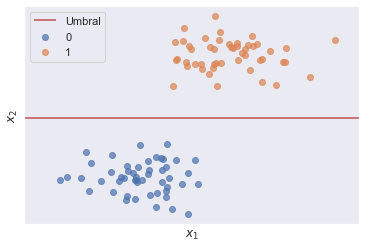

In [3]:
Bb,y=make_blobs(centers=2, n_features=2, random_state=2)
plt.hlines(-5.5,-5,5, colors='C3', label='Umbral')
plt.xlim(-5,5)
plt.xticks([])
plt.yticks([])
plt.ylabel('$x_2$')
plot_scatters(Bb,y)
plt.xlabel('$x_1$')
plt.legend();

En el ejemplo previo se puede observar visualmente que existen dos clases y que  podríamos separarlos mediante el uso del umbral definido por la línea recta. A este tipo de problemas se dice que son linealmente separables. 

Desafortunadamente, no todos los datos son lineales, por ejemplo la siguiente los datos alineados en dos circulos concéntricos:

[]

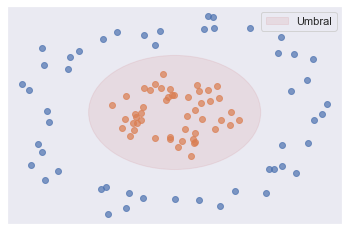

In [4]:
Bc,yc=make_circles(random_state=1,factor=.3, noise=.1)
fig, ax= plt.subplots()
for l in set(yc):
        idx=np.where(yc==l)
        ax.scatter(Bc[:,0][idx],Bc[:,1][idx], c=f"C{l}", alpha=0.7)
circ = plt.Circle((0, 0), 0.6, color='r', alpha=0.1)
ax.add_patch(circ)
ax.legend([circ], ['Umbral'])
ax.set_xticks([])
ax.set_yticks([])

En el caso anterior no es posisble poner un umbral o frontera lineal que separa de forma precisa los datos. Una opción es  utilizar un umbral dispuesto en forma circular (lo cual es simple para un ser humano, pero tanto para un método de aprendizaje), con lo que tendríamos una frontera no lineal.  Otra opción es hacer una proyeccción en un nuevo espacio, usualmente en una dimensión mayor a la actual, pero que permita visualizar la estructura de los datos de forma apropiada. 

En el ejemplo anterior podríamos transformar todos nuestros datos mediante el uso de la siguiente función:

$X^\prime_i=\{|x_{i,1}-\hat{x}_1|,|x_{i,2}-\hat{x}_2| \}$

donde $\hat{x}_j$ representa la media del valor de la característica $x_j$. En nuestro ejemplo, los datos están distribuidos en torno al origen por lo que la $\hat{x}_j \approx 0$, por ello podemos reducir la función a:

$X_i=\{|x_{i,1}|,|x_{i,2}| \}$


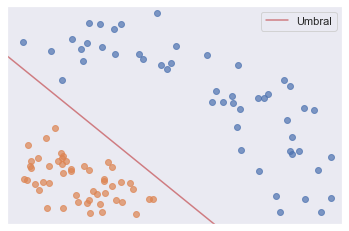

In [5]:
fig, ax= plt.subplots()
Bcn=np.abs(Bc) # Transformamos
for l in set(yc):
        idx=np.where(yc==l)
        ax.scatter(Bcn[:,0][idx],Bcn[:,1][idx], c=f"C{l}", alpha=0.7)
ax.plot([-0.1,0.7],[0.9,-0.1], c='C3',label='Umbral', alpha=0.7)
ax.set_xlim(-0.05,1.1)
ax.set_ylim(-0.05,1.1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend();

En el ejemplo anterior utilizamos la funcion $f(x_i,\hat{X})=\{|a_{i,1}-\hat{a}_1|,|a_{i,2}-\hat{a}_2| \}$  la cuál es la función de distancia conocidad como `manhattan` o `city block`. 

## Métricas y similitudes

En matemáticas, una  métrica o función de distancia es una función que define un valor de distancia entre un par de elementos/objetos definidos en un espacio métrico. La métrica induce una topología en espacio, en visualización nos interesa utilizar la topología inducida para ganar entendimiento delos datos bajo análisis. 

Toda métrica $d$ satisfase  los siguientes tres axiomas:

- $d(X,Y)=0$ si y solo si $X=Y$
- $d(X,Y)=d(X,Y)$ simetria
- $d(X,Y)\leq d(X,Z) + d(X,Z)$ desigualdad del triángulo

Por otro lado una función de  simulitud  cuantifica que tan parecidos son dos objetos. El concepto de `similitud` puede resultar  difícil de entender, esto debido al hecho de que el término puede tener diferentes interpretaciónes en de diferentes dominios y en ocasiones dentro del mismo dominio. Por ejemplo, los objetos  de la siguiete figura en términos de forma $c_1$ sería similar a $c_2$, pero si lo ponemos en terminos de color lo sería más similar a $s_1$

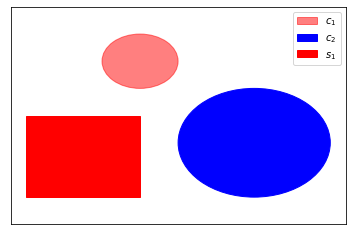

In [6]:
#fig, ax= plt.subplots()
#ax.set_xticks([])
#ax.set_yticks([])
#circ1 = plt.Circle((0.5, 2.5), 0.5, color='r',alpha=0.5)
#circ2 = plt.Circle((2, 1), 1, color='b')
#square1 = plt.Rectangle((-1,0),1.5,1.5,color='r')
#ax.add_patch(circ1)
#ax.add_patch(circ2)
#ax.add_patch(square1)
#ax.set_xlim(-1.2,3.2)
#ax.set_ylim(-0.5,3.5)
#ax.legend([circ1,circ2,square1], ['$c_1$','$c_2$','$s_1$']);

La siguiente tabla muestra algunas de las funciones de distancia y similitud más ampliamente utilizadas:

<table>
<tr><th>Función</th><th>Nombre</th><th>Dominio</th></tr>
 <tr><td>Distancia Manhattan</td><td>$$|X-Y|$$</td><td>Los reales</td></tr>
 <tr><td>Distancia Euclideana</td><td>$$\sqrt{(X-Y)^2}$$</td><td>Los reales</td></tr>
     <tr><td>Distancia Minkowski</td><td>$$((X-Y)^p)^{1/p}$$</td><td>Los reales</td></tr>
     <tr><td>Similaridad Coseno</td><td>$$\frac{X \cdot Y}{|X||Y|}$$</td><td>Los reales</td></tr>
     <tr><td>Similaridad de Jaccard</td>
      <td>$$\frac{|A \cap B|}{|A \cup B|}$$</td><td>Conjuntos</td></tr>
</table>

## Multidimensional scaling (MDS)
El escalado multidimensional (MDS) es una familia de técnicas comunmente utilizadas para que para visualizar la similitud/distancia de datos en un espacio bi bidimensional. La idea básica es la similitud de dos objetos puede ser definida en terminos de la distancia que exhiben en el plano en dimensiones mas bajas (usualmente 2D o 3D). 

MDS nos permite transformar("proyectar") un conjunto de datos a dimensiones menores, esto mientras se  mantienen las mismas distancias entre los objetos del conjunto original. El hecho de que MDS mantenga las distancias permite que los patrones que emergen de los datos se preserven. Lo cual, en teoría nos permitiría hacer anális exploratorio en datos de menores dimensiones al conjunto original. 

Por ejemplo, si tenemos un conjunto de datos de 4 dimensiones y se desea visualizar en 2D, se aplicaria MDS para escalarlo a 2 dimensiones. Dado que las distancias entre objetos se mantiene en ls datos transformados, en caso de que hubiese una estructura de  grupos, estos persistirian  después del procedimiento de escalado y podríamos visualizarlos en 2D.

Sin embargo, es posible que nuevas coordenanas en la dimensión inferior ya no tengan un significado implicito.

La presentación gráfica de los datos proporcionada por MDS permite  explorar visualmente la estructura de los datos y hace posible detectar regularidades que podrían estar ocultas en matrices numéricas. Otra aplicación de MDS es aplicarlo a modelos de juicios de disimilitud. Por ejemplo, dados dos objetos de interés, su disimilitud percibida puede explicarse como resultado de la `arimética mental` que podría ser ajustada a una función de distancia. Según este modelo, la mente genera una impresión de disimilitud al agregar las diferencias percibidas de los dos objetos sobre sus propiedades.

### MDS como técnica de exploración de datos

El análisis de datos exploratorio se utiliza para estudiar datos que no están definidos mediamte una teoría explícita que predice sus magnitudes o patrones.  

Considere el siguiente ejemplo tomado de \[1\]. El Resumen estadístico de USA publicado en 1970, proporciona un resumen sobre la tasa de ocurrencia de diferentes delitos en los 50 de USA. Una pregunta de interés sería  hasta qué punto se puede predecir una alta tasa de delitos de homicidio, por ejemplo, sabiendo que la tasa de delitos de robo con allanamiento de morada es alta.  Se puede obtener una respuesta parcial a esta pregunta calculando las correlaciones de las tasas de delincuencia. A continuación mostramos la tabla de correlaciones.

In [7]:
delitos=pd.read_csv('delitos.csv',sep=' ')
delitos

,Crime,Murder,Rape,Robbery,Assault,Burglary,Larceny,AutoTheft
0,Murder,1.00,0.52,0.34,0.81,0.28,0.06,0.11
1,Rape,0.52,1.00,0.55,0.70,0.68,0.60,0.44
2,Robbery,0.34,0.55,1.00,0.56,0.62,0.44,0.62
3,Assault,0.81,0.70,0.56,1.00,0.52,0.32,0.33
4,Burglary,0.28,0.68,0.62,0.52,1.00,0.80,0.70
5,Larceny,0.06,0.60,0.44,0.32,0.80,1.00,0.55
6,AutoTheft,0.11,0.44,0.62,0.33,0.70,0.55,1.00


Pero incluso en una matriz de correlación tan pequeña, no es fácil comprender la estructura de estos coeficientes. Esta tarea se simplifica mucho al representar las correlaciones en forma gráfica, como en la siguiente figura.

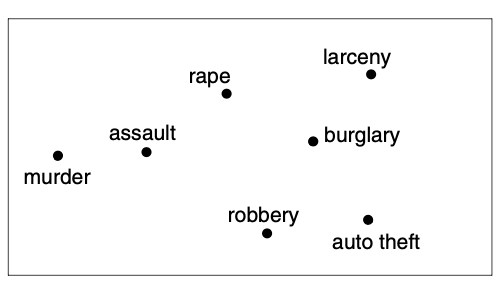

La imagen es una representación bidimensional obtenida con MDS, cada delito se muestra como un punto. Los puntos están dispuestos de tal manera que sus distancias preserven las correlaciones. Es decir, dos puntos están muy juntos (como *Muerder* y *Assault*) si sus correspondientes tasas de criminalidad están altamente correlacionadas. Por el contrario, dos puntos están muy separados si sus tasas de criminalidad no están tan estrechamente correlacionadas (como *Murder* y *Larceny*).

La calidad de una proyección puede puede comprobarse sin saber cómo se encontró. Todo lo que hay que hacer es medir las distancias entre los los puntos originales de $X$ y compararlas con los obtenidos por MDS.

En este curso, no trataremos a detalle el algoritmo, ya que nuestro propósito es aplicarla análisis exploratorio utilizaremos la implementación MDS disponible en `sklearn.manifold`

### Ejemplo MDS - Iris

Mostraremos el funcionamiento de MDS mediante el uso del conjunto de datos en 4 dimensiones **Iris**.


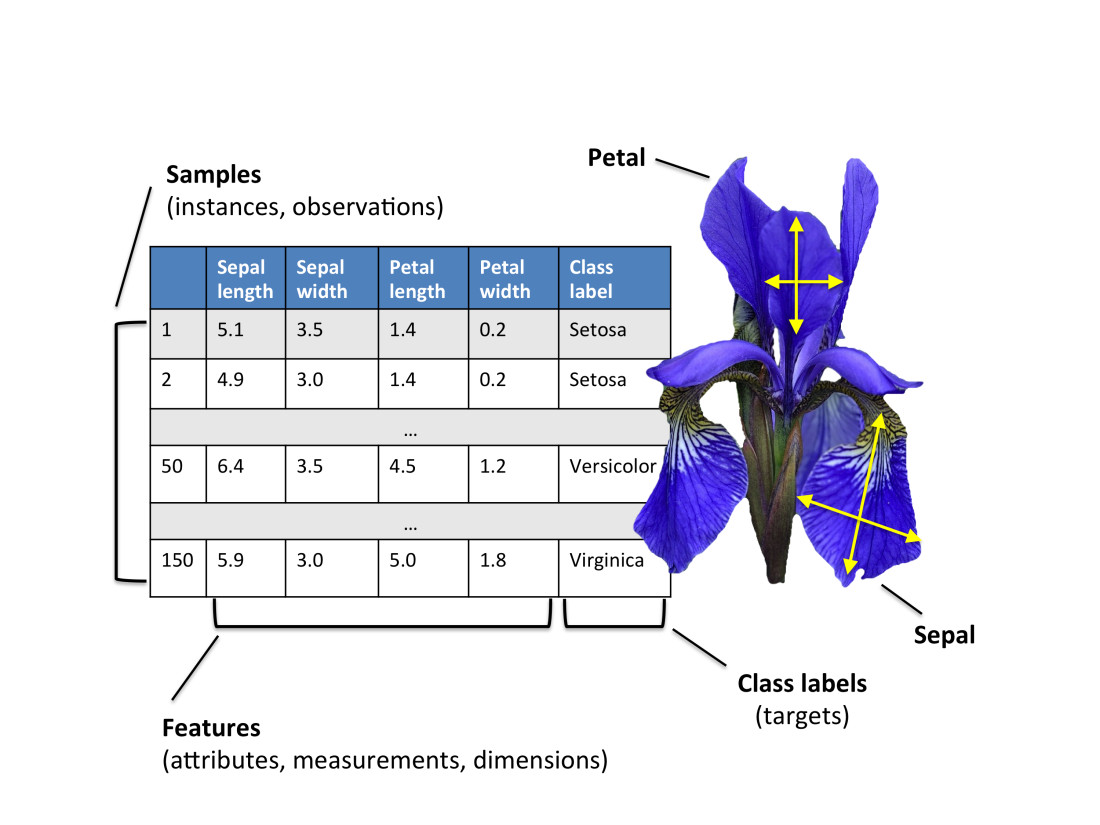

El dataset contiene los datos medidos para longitud y ancho de sépalo y el pétalo para un conjuto de 150 flores de iris de tres clases diferentes.

In [8]:
iris = datasets.load_iris()
Bi = iris.data  # los datos
yi = iris.target # las etiquetas
Bi.shape #  150 ejemplos en cuatro dimensiones

(150, 4)

Como aún son relativamente pocas característica podemos hacer un scatter plot todos los pares. Por simplicidad ponemos todo el grid. Sin embargo, note que las partes superior e inferior de la diagonal son simétricas, pero con los ejes transpuestos. A continuación dejamos el snipet de código para graficar los pares de coordenadas.

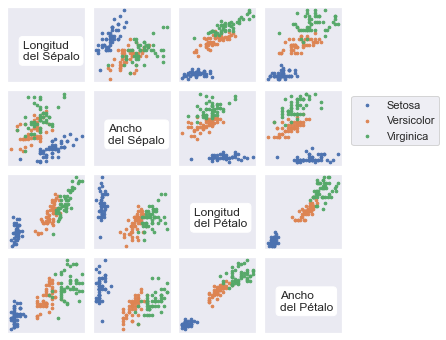

In [9]:
fig, axs=plt.subplots(nrows=4,ncols=4, figsize=(6,6))
features=[(0,'Longitud \ndel Sépalo'),(1,'Ancho \ndel Sépalo'),
          (2,'Longitud \ndel Pétalo'),(3,'Ancho \ndel Pétalo')]
clases=['Setosa','Versicolor','Virginica']
for i,t in features:
    for j,t in features:
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        if i==j:
            axs[i,j].annotate(t,(0.2,0.3),
                              bbox=dict(boxstyle="round", fc="w"))
            continue
        for l in set(yi):
            idx=np.where(yi==l)
            axs[i,j].scatter(Bi[idx][:,i],Bi[idx][:,j], c=f"C{l}",s=7, 
                             label=clases[l])
axs[1,3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(hspace=0.1, wspace=0.1)

Como podemos observar la clase `Setosa` se puede separar de las dos restantes  eligiendo  cualquier par de características, por otro lado `Versicolor` y `Virginica` tienen un traslape independientemente del par de dimensiones que se elijan. Al aplicar MDS a este conjunto de datos debería manternese una estructura similar.

Para aplicar MDS es primer paso es calcular la matriz de distancias $D$: dada una colección de objetos ${\Bbb B}$ tal que $N=|{\Bbb B}|$, la matriz de distancias es una matriz simétrica $N \times N$ que indica que tan  diferentes son todas las posibles parejas de objeto en la colección. Es decir cada elemento $d_{i,j} \in D$ está definidos como:

$d_{i,j}= f(X_i, X_j)$ 

donde $f$ puede ser cualquier función de distancia. Retomando el ejemplo de las flores de iris, La matriz de distancias sería una de $150 \times 150$. La librería `sklearn` cuenta una amplia librería de funciones de distancia  `sklearn.metrics.pairwise_distances`. 

Pare nuestro ejemplo utilizaremos la distancia Euclideana, que es la que usa por defecto `sklearn.manifold.mds`.

In [10]:
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
# normalizamos para evitar que los rangos de las varibles influyan
# en la función de distancia
scaler=MinMaxScaler() 
Bin=scaler.fit_transform(Bi)

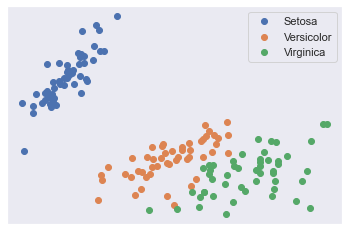

In [11]:
# solo especificamos la dimensión y la semilla para reproducir
embedding = MDS(n_components=2, random_state=1)
Xit = embedding.fit_transform(Bin)# embebemos los datos en dimension 2
for l in set(yi):
    idx=np.where(yi==l)
    plt.scatter(Xit[:,0][idx],Xit[:,1][idx],c=f'C{l}', 
                label=clases[l])
plt.legend()
plt.xticks([])
plt.yticks([]);

Como podemos ver la figura resultante mantiene los el patrón en el que *Versicolor* y *Virginica* tienen un tralape, mietras quela clase *Setosa* está claramente separada. Puede probar cambiando `random_state` para observar como la estrutura se mantiene para ejecuciones con diferentes semillas.  Note que para el caso de este dataset también es posible separar la mayoría de los datos mediante un umbral lineal, solo que requeriría más de una línea de frontera (en general serían necesarias el número de clases menos una frontera).

La principal desventaja con los métodos MDS no lineales es que son computacionalmente muy intensivos para grandes conjuntos de datos. Sin embargo, la complejidad computacional se puede reducir al restringir la atención a un subconjunto de las distancias entre los elementos de datos.

## Análisis de Componentes Principales 

Análisis de componentes principales (PCA) es una técnica estadística que se utiliza para reducir la dimensionalidad de los datos. PCA se basa en  la diagonalización de la matriz de covarianza para un conjunto de datos $X$. La matriz de covarianza $\mathit{cov}(X)$
se define como:


$$\mathit{cov} (X) = \frac {1} {n} \Sigma_{i = 1}^n x_i x_i^{T}$$

asumiendo que $E(\bar{x})= \frac {1}{n}\Sigma_{i = 1}^n x_i = 0$. El problema se puede plantear de la siguiente manera:


$$\mathit{cov} \cdot V_j = \lambda V_j$$


donde $\lambda$ son los `eigenvalores` y $V$ son los `eigenvectores`. Al resolver la ecuación anterior se genera una base ortonormal para los vectores propios $V_j$ (es decir, componentes principales. Usando $V$ se puede producir una proyección en un espacio dimensional inferior $R^{m^\prime}$ (es decir, $m^\prime<m$) con la siguiente ecuación.


$$X^\prime = X \lbrack V_1, V_2, \dots, V_{m^\prime} \rbrack$$


## Ejemplos PCA



A continucación presentaremos un par de ejemplos ilustrativos sobre la implementación de esta técnica en python tomados del libro [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook)

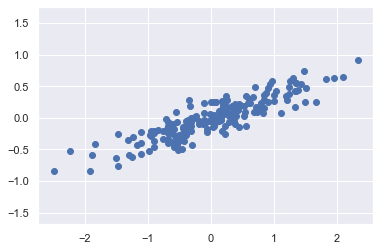

In [12]:
#####################################################
### Ejemplo PCA reducción de dimensionalidad ########
####################################################

#Generamos un conjunto de datos en R^2 con una varianza dominante en una dirección
rng = np.random.RandomState(1)
Bp = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(Bp[:, 0], Bp[:, 1])
plt.axis('equal');

En este ejemplo claramente existe una relación lineal entre los datos, utilizando PCA determinamos los vectores  𝑉𝑗 (componentes principales ) que determinan las direcciones en las que la varianza es máxima y valores  𝜆𝑗  que nos dicen cuanta varianza se esta explicando y determinan la longitud al cuadrado de los componentes principales.

In [13]:
#Calculamos V_j y \lambda_j
pca = PCA(n_components=2)
pca.fit(Bp)

PCA(n_components=2)

In [14]:
# Para acceder los componentes principales utilizamos .components_
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [15]:
# Para acceder a los valores principales utilizamos 
print(pca.explained_variance_)

[0.7625315 0.0184779]


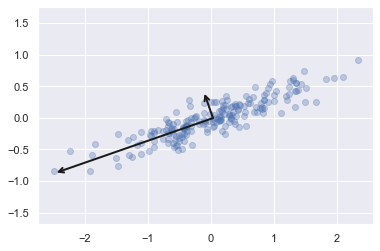

In [16]:
#Representamos los datos y los componentes principales en una misma grafica
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops)
# plot data
plt.scatter(Bp[:, 0], Bp[:, 1], alpha=0.3)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Estos vectores representan los ejes principales de los datos, y la longitud del vector es una medida de que tan `importante` es ese eje para describir la distribución de los datos; más precisamente, es una medida de la varianza de los datos cuando se proyectan en ese eje. La proyección de cada punto de datos sobre los ejes principales son los "componentes principales" de los datos.

El uso de PCA para la reducción de dimensionalidad implica volver cero uno o más de los componentes principales más pequeños, lo que da como resultado una proyección de menor dimensión de los datos que conserva la varianza máxima en los datos.

Siguiendo con nuestro  ejemplo de PCA como una transformación de reducción de dimensionalidad:

In [17]:
pca = PCA(n_components=1)
pca.fit(Bp)
Bp_pca = pca.transform(Bp)
print("dimensión original:   ", Bp.shape)
print("dimensión reducida:", Bp_pca.shape)

dimensión original:    (200, 2)
dimensión reducida: (200, 1)


Los datos transformados se han reducido a una única dimensión. Para comprender el efecto de esta reducción de dimensionalidad, podemos realizar la transformación inversa de estos datos reducidos y trazarlos junto con los datos originales:

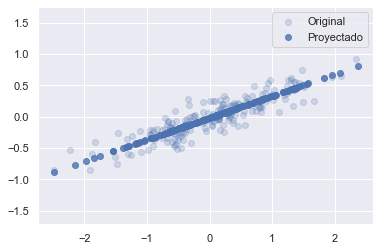

In [18]:
Bp_new = pca.inverse_transform(Bp_pca)
plt.scatter(Bp[:, 0], Bp[:, 1], alpha=0.2, label='Original')
plt.scatter(Bp_new[:, 0], Bp_new[:, 1], alpha=0.8,color='b',label='Proyectado')
plt.axis('equal');
plt.legend()

Los puntos más claros son los datos originales, mientras que los puntos oscuros son la versión proyectada. Esto hace evidente lo que significa una reducción de dimensionalidad de PCA: la información a lo largo del eje o ejes principales menos importantes se elimina, dejando solo el (los) componente (s) de los datos con la varianza más alta.
La fracción de varianza que se corta (proporcional a la extensión de puntos alrededor de la línea formada en esta figura) es aproximadamente una medida de cuánta "información" se descarta en esta reducción de dimensionalidad.

Este conjunto de datos de dimensión reducida es, en algunos sentidos, "lo suficientemente bueno" para codificar las relaciones más importantes entre los puntos: a pesar de reducir la dimensión de los datos en un 70%, la relación general entre los puntos de datos se conserva en su mayoría.

### PCA para visualización: dígitos escritos a mano

La utilidad de la reducción de dimensionalidad puede no ser del todo evidente en solo dos dimensiones, pero se vuelve mucho más clara cuando se observan datos de alta dimensión. Para ver esto, utilizaremos PCA para reducir la dimensionalidad  en los  datos de **dígitos** presentes en sklearn

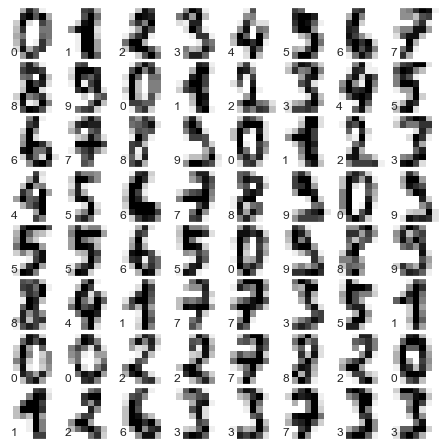

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Este conjuntos consta de $1797$ imágenes de dígitos escritos a mano cada una de tamaño $8\times8$ pixeles es decir cada imagen consta de $64$ pixeles y para este ejecicio representaremos cada imagen como un vector $\vec{X} \in \Bbb{R}^{64}$ estos vectores estan almacenados en **digits.data**

In [20]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


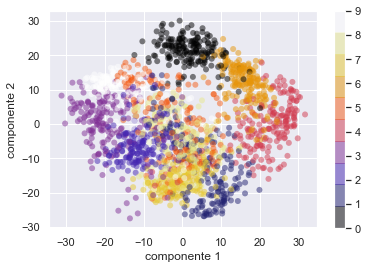

In [21]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('CMRmap', 10))
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.colorbar();

### Elegir el número de componentes
En la práctica una parte importante del uso de PCA es la capacidad de elegir cuántos componentes se necesitan para describir los datos. Esto se puede determinar observando la razón de varianza explicada acumulada en función del número de componentes:

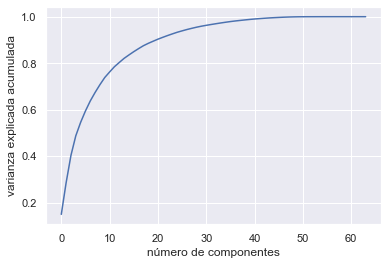

In [22]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('varianza explicada acumulada');

In [23]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

Esta curva cuantifica qué parte de la varianza total de las 64 dimensiones está contenida dentro de los primeros  𝑁  componentes. Por ejemplo, vemos que con estos datos, los primeros 10 componentes contienen aproximadamente el 75% de la varianza, mientras que se necesita alrededor de 50 componentes para describir cerca del 100% de la varianza.

Aquí vemos que nuestra proyección bidimensional pierde mucha información (medida por la varianza explicada) y que necesitaríamos alrededor de 20 componentes para explicar el 90% de la varianza. Mirar esta gráfica para un conjunto de datos de dimensiones altas puede ayudarnos a comprender el nivel de redundancia presente en múltiples observaciones.

### PCA como filtro de ruido

PCA también se puede utilizar como método de filtrado para datos ruidosos. La idea es la siguiente: cualquier componente con una variación mucho mayor que el efecto del ruido no debería verse afectado relativamente por el ruido. Por lo tanto, si reconstruimos los datos utilizando solo el subconjunto más grande de componentes principales, la señal original debe mantener y eliminar el ruido.

Veamos cómo se ve esto con los datos de **dígitos**.  Primero trazaremos varios de los datos de entrada libres de ruido:

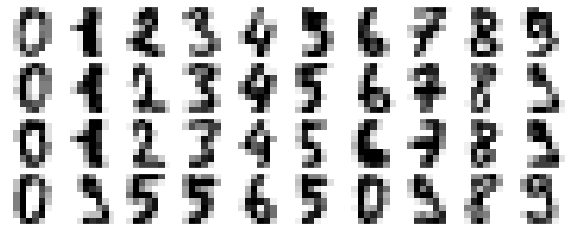

In [24]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Ahora agreguemos algo de ruido aleatorio para crear un conjunto de datos ruidoso y volvamos a gráficar:

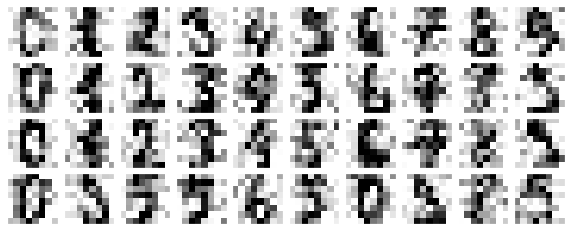

In [25]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

A simple vista, está claro que las imágenes contienen píxeles que son ruido. Hacemos PCA en los datos ruidosos, cuidando que la proyección conserve el 50% de la varianza:

In [26]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Aquí el 50% de la varianza se explica con 12 componentes principales. Ahora calculamos estos componentes y luego usamos la inversa de la transformación para reconstruir los dígitos filtrados:

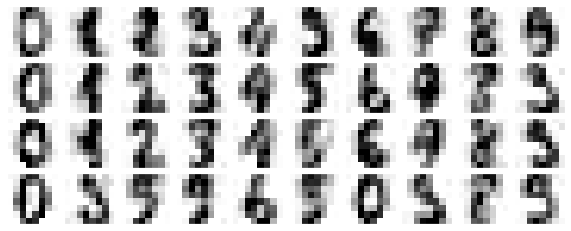

In [27]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Esta propiedad de preservación de señal / filtrado de ruido hace que PCA sea una herramienta de selección de características muy útil; por ejemplo, en lugar de entrenar un clasificador en datos de muy alta dimensión, puede entrenar el clasificador en la representación de dimensiones inferiores, que automáticamente servirá para filtrar el ruido aleatorio en los datos.

## Kernel PCA

La principal desventaja de PCA es que está diseñado para trabajar con datos que presentan relaciones lineales. Una solución que permite usar PCA sobre datos que presentan relaciones no lineales es Kernel (KPCA). KPCA es una generalización de PCA donde la matriz de covarianza se calcula a partir de un producto escalar que no es necesariamente lineal, es decir, la matriz $ \mathit{cov}(X)$ se reemplaza por una matriz $\mathit{cov}_{\phi}(X)$ definido como:


$$\mathit{cov}{\phi} = \frac{1}{n} \sum_{i=1}^n \phi(x_i) \phi(x_i)^{T}$$

donde $\phi$ es una función del núcleo tal que $\phi(x):R^m \to R^{p}$ para $p>m$. El objetivo de esta generalización es mapear el conjunto de datos $X \subset R^m$ a un espacio de alta dimensión donde los datos se vuelven linealmente separables. Una vez en un espacio lineal, se puede realizar el análisis de componentes principales.

KPCA es la solución para los eigenvalores y eigenvectores dados por la ecuación anterior (ver referencia [2]).

### Ejemplo KPCA

A continuación presentamos un ejemplo donde utilizamos 

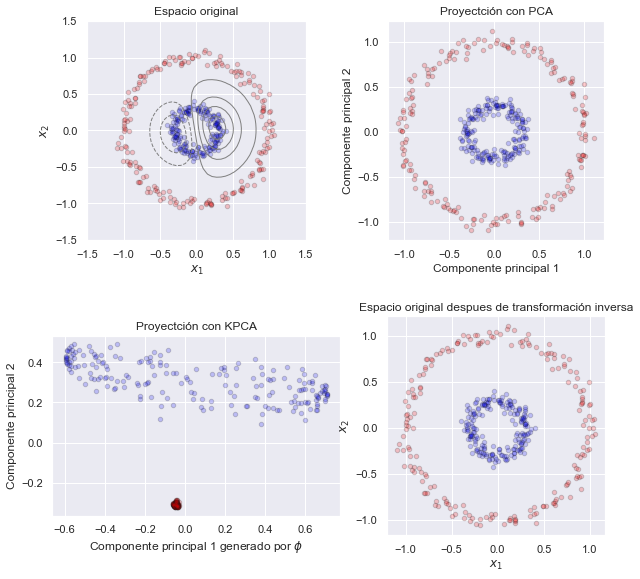

In [28]:
# Ejemplo KPCA
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure(figsize=[8.5,8.5])
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Espacio original")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",alpha=0.2,
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",alpha=0.2,
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red", alpha=0.2,
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",alpha=0.2,
            s=20, edgecolor='k')
plt.title("Proyectción con PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",alpha=0.2,
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",alpha=0.2,
            s=20, edgecolor='k')
plt.title("Proyectción con KPCA")
plt.xlabel("Componente principal 1 generado por $\phi$")
plt.ylabel("Componente principal 2")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",alpha=0.2,
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",alpha=0.2,
            s=20, edgecolor='k')
plt.title("Espacio original despues de transformación inversa")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplots_adjust(0.02, 0.10, 0.98, 0.94, 0.04, 0.35)

plt.show()

Note  que a KPCA  se le debe proporcionar una función de kernel, la cual en terminos simples podemos considerar una función de similitud/distancia. 

Aunque las técnicas de proyección son de utilidad para ganar entendimiento de los datos, no exisite una que funcione para todo los conjunto de datos. Por tanto, el científico de datos debe explorar varias estrategías y combinarla con el conocimiento del dominio y otrás técnicas estadísticas y de aprendizaje.

# Actividad

<div class="alert alert-success">
    <ol>
    <li>Investigar sobre $t$-SNE y/o SVD (ver [5,6]) su funcionamiento y sus implementaciones existentes, esto para incluirlas como una alternativa mas para proyección de datos de alta dimensión. </li>
    <li>Determine si es posible encontrar una estructura en los datos del contenidos en <b>datos2.csv.zip</b>. 
        <ul>
            <li>Puede obtener toda la matriz de datos como:
                <pre>data=pd.read_csv('datos2.csv').values[1:,1:]</pre>
                omitimos el encabezado y la primera columna que contiene el identificador de cada objeto en la colección
            </li>
            <li>Describa los datos</li>
            <li>Analice los datos usando las diferentes estrategias/herramientas vistas hasta ahora. Deberá aplicar al menos dos alternativas de proyección para obtener una representación 2D de los datos. </li>
            <li>Comparar las gráficas de las proyecciones en términos de su capacidad descriptiva y explicativa.<br></li>
            <li>Para una proyección adecuada deberían poder identificarse entre 7 y 14 clases</li>
        </ul>
    </li>
    <li> Seleccione un dataset de al menos dimension 20 de su interés y proponga/realice un análisis basado en métodos de proyección. Si no tiene un dataset en mente, puede descargar de un dataset de alguno de los siguientes sitios:
        <ul>
            <li>https://archive.ics.uci.edu/ml/datasets.php</li>
            <li>https://www.kaggle.com/</li>
            <li>https://codalab.org/</li>
            <li>Comparar distintas&nbsp; proyecciones en términos de su capacidad descriptiva y explicativa.<br></li>
        </ul>
    </li>
    <li>Realice un reporte de las estrategias que haya aplicado. El documento deberá incluir las siguientes secciones:
        <ul>
            <li>Introducción</li>
            <li>Al menos una sección del análisis realizados y los resultados obtenidos para cada dataset.</li>
            <li>Conclusiones</li>
            <li>Referencias</li>
        </ul>
    </li>
</ol>
<b>Nota</b>: Subir un documento en formato pdf. Si utiliza estrategias adicionales por favor incluir las referencias. Si tienes alguna pregunta respecto al material o la actividad puedes ingresar al foro de dudas.
</div>

## Referencias

[1] Borg, I., & Groenen, P. J. (2005). Modern multidimensional scaling: Theory and applications. Springer Science & Business Media. <br>
[2] Schölkopf, B., Smola, A., & Müller, K. R. (1997, October). Kernel principal component analysis. In International conference on artificial neural networks (pp. 583-588). Springer, Berlin, Heidelberg.<br>
[3] Mulekar, Madhuri S., and C. Scott Brown. "Distance and Similarity Measures." (2014): 385-400.<br>
[4] Pellegrin, L., Loyola-González, O., Ortiz-Bejar, J., Medina-Pérez, M. A., Gutiérrez-Rodríguez, A. E., Tellez, E. S., ... & Esclalante, H. J. (2019). Image annotation as Text-Image matching: Challenge design and results. Computación y Sistemas, 23(4). doi: 10.13053/CyS-23-4-3207
[5] Van der Maaten, L., & Hinton, G. (2008). Visualizing data using t-SNE. Journal of machine learning research, 9(11).
[6] Talwalkar, A., Kumar, S., Morhri, M., & Rowley, H. A. (2013). Large Scale SVD and Manifold Learning.

